In [3]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np

# Ensure 'image_paths' and 'image' are defined
try:
    image_paths
except NameError:
    # Rebuild image_paths if not defined
    data_root = r"J:\projects\brain disease two\Alzheimer_MRI_4_classes_dataset"
    image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')
    image_paths = []
    for root, dirs, files in os.walk(data_root):
        for file in files:
            if file.lower().endswith(image_extensions):
                image_paths.append(os.path.join(root, file))

try:
    image
except NameError:
    img_path = image_paths[0]
    image = np.array(Image.open(img_path).convert("RGB"))

# Ensure 'masks' is defined
try:
    masks
except NameError:
    # Try to generate masks if mask_generator is available
    try:
        mask_generator
    except NameError:
        from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
        import torch
        sam_checkpoint = "J:\projects\brain disease two\sam_vit_h_4b8939.pth"
        model_type = "vit_h"
        device = "cuda" if torch.cuda.is_available() else "cpu"
        sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
        sam.to(device=device)
        mask_generator = SamAutomaticMaskGenerator(sam)
    masks = mask_generator.generate(image)

# Display the original image
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

# Overlay all masks on the image
overlay = image.copy()
for mask in masks:
    seg = mask['segmentation']
    color = np.random.randint(0, 255, (1, 3), dtype=np.uint8)
    overlay[seg] = overlay[seg] * 0.5 + color * 0.5  # Blend mask color

plt.figure(figsize=(8, 8))
plt.imshow(overlay.astype(np.uint8))
plt.title("Image with All Masks Overlayed")
plt.axis("off")
plt.show()

<>:35: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\p'
C:\Users\shrir\AppData\Local\Temp\ipykernel_19584\4130327075.py:35: SyntaxWarning: invalid escape sequence '\p'
  sam_checkpoint = "J:\projects\brain disease two\sam_vit_h_4b8939.pth"
C:\Users\shrir\AppData\Local\Temp\ipykernel_19584\4130327075.py:35: SyntaxWarning: invalid escape sequence '\p'
  sam_checkpoint = "J:\projects\brain disease two\sam_vit_h_4b8939.pth"


OSError: [Errno 22] Invalid argument: 'J:\\projects\x08rain disease two\\sam_vit_h_4b8939.pth'

C:\Users\shrir\AppData\Roaming\Python\Python312\site-packages\segment_anything\build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


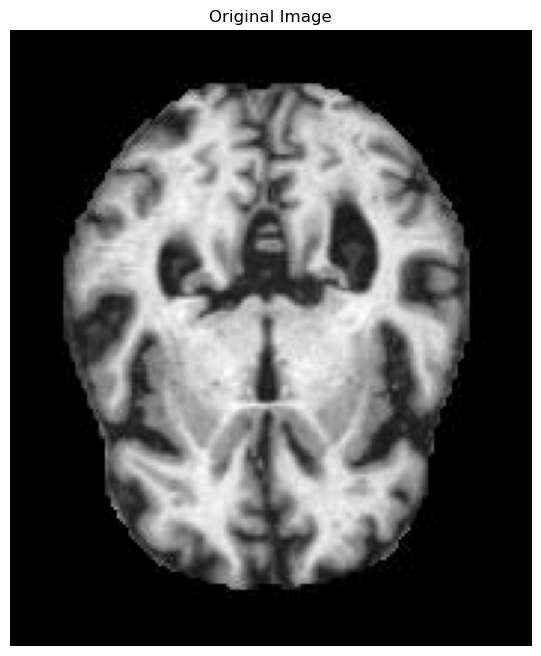

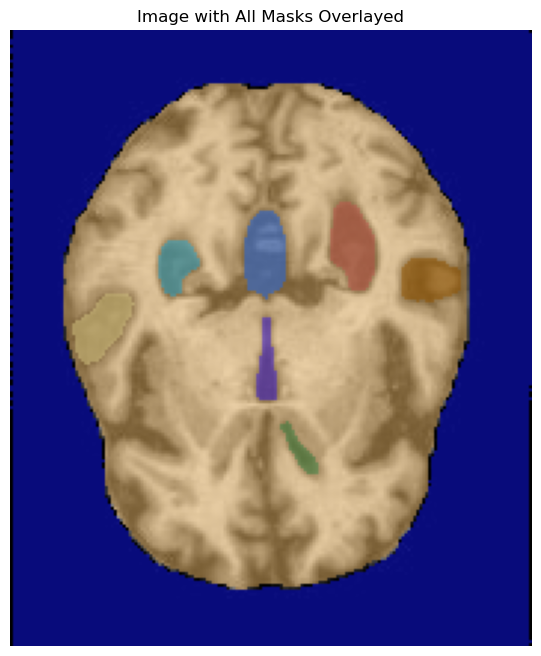

In [4]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np

# Ensure 'image_paths' and 'image' are defined
try:
    image_paths
except NameError:
    data_root = r"J:\projects\brain disease two\Alzheimer_MRI_4_classes_dataset"
    image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')
    image_paths = []
    for root, dirs, files in os.walk(data_root):
        for file in files:
            if file.lower().endswith(image_extensions):
                image_paths.append(os.path.join(root, file))

try:
    image
except NameError:
    img_path = image_paths[0]
    image = np.array(Image.open(img_path).convert("RGB"))

# Ensure 'masks' is defined
try:
    masks
except NameError:
    try:
        mask_generator
    except NameError:
        from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
        import torch
        sam_checkpoint = r"J:\projects\brain disease two\sam_vit_h_4b8939.pth"  # Use raw string here!
        model_type = "vit_h"
        device = "cuda" if torch.cuda.is_available() else "cpu"
        sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
        sam.to(device=device)
        mask_generator = SamAutomaticMaskGenerator(sam)
    masks = mask_generator.generate(image)

# Display the original image
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

# Overlay all masks on the image
overlay = image.copy()
for mask in masks:
    seg = mask['segmentation']
    color = np.random.randint(0, 255, (1, 3), dtype=np.uint8)
    overlay[seg] = overlay[seg] * 0.5 + color * 0.5  # Blend mask color

plt.figure(figsize=(8, 8))
plt.imshow(overlay.astype(np.uint8))
plt.title("Image with All Masks Overlayed")
plt.axis("off")
plt.show()